In [1]:
## Lesson-01 Assignment

>

`各位同学大家好，欢迎各位开始学习我们的人工智能课程。这门课程假设大家不具备机器学习和人工智能的知识，但是希望大家具备初级的Python编程能力。根据往期同学的实际反馈，我们课程的完结之后 能力能够超过80%的计算机人工智能/深度学习方向的硕士生的能力。`

## 本次作业的内容

#### 1. 复现课堂代码

在本部分，你需要参照我们给大家的GitHub地址里边的课堂代码，结合课堂内容，复现内容。

In [2]:
import random
def adj():return random.choice('蓝色的 | 好看的 | 小小的'.split('|')).strip()
def adj_star():return random.choice([lambda :'',lambda :adj()+adj_star()])()

In [7]:
adj_star()

'蓝色的小小的'

In [8]:
adj_grammar = """
Adj* => null | Adj Adj*
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [9]:
def create_grmmar(grammar_rule,split="=>",line_split='\n'):
    grammar={}
    for line in grammar_rule.split(line_split):
        if not line.strip():continue
        exp,stmt=line.split(split)
        grammar[exp.strip()]=[s.split() for s in stmt.split('|')]
    return grammar

In [10]:
adj_grammar_res=create_grmmar(grammar_rule=adj_grammar)
adj_grammar_res

{'Adj': [['蓝色的'], ['好看的'], ['小小的']], 'Adj*': [['null'], ['Adj', 'Adj*']]}

In [11]:
simple_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [12]:
example_grammar=create_grmmar(simple_grammar)
example_grammar

{'Adj': [['蓝色的'], ['好看的'], ['小小的']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'sentence': [['noun_phrase', 'verb_phrase']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'verb_phrase': [['verb', 'noun_phrase']]}

In [15]:
def generate(gram,target):
    if target not in gram:return target
    expaned=[generate(gram,t)  for t in random.choice(gram[target])]
    return ''.join([e if e!='/n' else '\n' for e in expaned if e!='null'])

In [16]:
generate(example_grammar,'sentence')

'一个小小的蓝色的小小的蓝色的小猫看见一个好看的小小的女人'

In [17]:
#在西部世界里，一个”人类“的语言可以定义为：
human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们 
寻找 = 找找 | 想找点 
活动 = 乐子 | 玩的
"""
#一个“接待员”的语言可以定义为
host = """
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = null
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？
"""

In [19]:
for i in range(10):
    print(generate(gram=create_grmmar(host,split='='),target='host'))

女士,你好我是8号,请问你要打猎吗？
先生,您好我是588543号,您需要打猎吗？
女士,你好我是7号,请问你要打牌吗？
你好我是2号,请问你要赌博吗？
小朋友,你好我是37号,您需要打牌吗？
你好我是752号,您需要打牌吗？
您好我是7号,请问你要打牌吗？
您好我是4798号,请问你要赌博吗？
先生,你好我是4号,请问你要打牌吗？
先生,你好我是66号,您需要赌博吗？


### 概率模型

In [20]:
import jieba
def cut(string):return list(jieba.cut(string))

In [22]:
TOKEN=[]
for i,line in enumerate((open('article_9k.txt',encoding='utf-8'))):
    if i%10000==0:print(i)
    if i>100000:break
    TOKEN+=cut(line)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\LIUQIO~1\AppData\Local\Temp\jieba.cache


0


Loading model cost 1.546 seconds.
Prefix dict has been built succesfully.


10000
20000
30000
40000
50000
60000
70000
80000


In [23]:
TOKEN[:5]

['此外', '自', '本周', '6', '月']

In [24]:
from collections import Counter
words_count=Counter(TOKEN)
frequiences=[f for w,f in words_count.most_common(100)]
x=[i for i in range(100)]

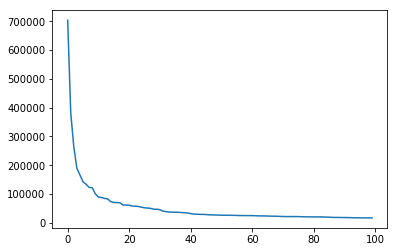

In [25]:
import matplotlib.pyplot as plt
plt.plot(x, frequiences)
plt.show()

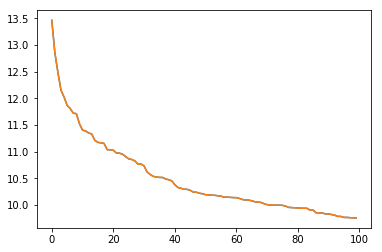

In [27]:
import numpy as np
plt.plot(x, np.log(frequiences))
plt.show()

In [28]:
def prob_1(word):
    return words_count[word]/len(TOKEN)

In [29]:
prob_1('我们'),prob_1('好'),prob_1('开心')

(0.0011341645999654677, 0.0006622109092081429, 2.3328077799309737e-05)

In [30]:
TOKEN=[str(t) for t in TOKEN]
TOKEN_2_GRAM=[''.join(TOKEN[i:i+2]) for i in range(len(TOKEN[:-2]))]
TOKEN_2_GRAM[:10]

['此外自', '自本周', '本周6', '6月', '月12', '12日起', '日起除', '除小米', '小米手机', '手机6']

In [31]:
words_count_2=Counter(TOKEN_2_GRAM)

In [32]:
def prob_2(word1,word2):
    if word1+word2 in words_count_2:return words_count_2[word1+word2]/len(TOKEN_2_GRAM)
    else:
        return 1/len(TOKEN_2_GRAM)

In [33]:
prob_2('我们','在'),prob_2('去','吃饭'),prob_2('看','手机')

(3.0536514065072974e-05, 7.946304775297799e-07, 1.5892609550595599e-06)

In [34]:
def get_probablity(sentence):
    words=cut(sentence)
    sentence_pro=1
    for i,word in enumerate(words[:-1]):
        next_=words[i+1]
        probability=prob_2(word,next_)
        sentence_pro*=probability
    return sentence_pro

In [35]:
get_probablity('我今天买了一台苹果手机')

3.6875821834849864e-37

In [38]:
for sen in [generate(gram=create_grmmar(human,split='='),target='human') for i in range(10)]:
    print('sentence: {} with Prb: {}'.format(sen, get_probablity(sen)))

sentence: 俺想找点玩的 with Prb: 6.227302750113582e-29
sentence: 我想找点玩的 with Prb: 3.045151044805542e-26
sentence: 俺找找乐子 with Prb: 1.4628558550905883e-21
sentence: 我们找找乐子 with Prb: 7.314279275452941e-21
sentence: 我们想找点乐子 with Prb: 1.0605704949406767e-20
sentence: 我们想找点乐子 with Prb: 1.0605704949406767e-20
sentence: 俺想找点玩的 with Prb: 6.227302750113582e-29
sentence: 我找找玩的 with Prb: 1.0710960730195362e-26
sentence: 我想找点玩的 with Prb: 3.045151044805542e-26
sentence: 俺想找点乐子 with Prb: 1.8285698188632354e-22


#### 2. 请回答以下问题

回答以下问题，并将问题发送至 mqgao@kaikeba.com中：
```
    2.1. what do you want to acquire in this course？
    2.2. what problems do you want to solve？
    2.3. what’s the advantages you have to finish you goal?
    2.4. what’s the disadvantages you need to overcome to finish you goal?
    2.5. How will you plan to study in this course period?
```

#### 3. 如何提交
代码 + 此 jupyter 相关，提交至自己的 github 中(**所以请务必把GitHub按照班主任要求录入在Trello中**)；
第2问，请提交至mqgao@kaikeba.com邮箱。
#### 4. 作业截止时间
此次作业截止时间为 2019.7.6日

#### 5. 完成以下问答和编程练习

>

## 基础理论部分

#### 0. Can you come up out 3 sceneraies which use AI methods? 

Ans: {自动驾驶、机器人、推荐系统}

#### 1. How do we use Github; Why do we use Jupyter and Pycharm;

Ans: {如何使用github？这个问题是啥意思？我只会git clone、git add，不会的时候就csdn了 <br>
      Jupyter交互的时候比较好 一般做数据清洗和展示 想要看到一步一步的结果就用Jupyter  <br>
      做完整的工程还是Pycharm，比较好管理包和文件}

#### 2. What's the Probability Model?

Ans:概率模型是一种随机现象出现的数学表示，通俗的说就是计算在样本空间内定义的随机事件出现的概率。

#### 3. Can you came up with some sceneraies at which we could use Probability Model?

Ans:朴素贝叶斯算法、n-gram语言模型、马尔科夫链。

#### 4. Why do we use probability and what's the difficult points for programming based on parsing and pattern match?

Ans:概率是可以用数学表示和计算的。<br>
基于模式匹配的模型在语料库复杂时代码没办法通用化。

#### 5. What's the Language Model;

Ans:语言模型是词向量的概率分布。给定一个句子，将其看作成一个序列，指定序列出现的概率是序列里每个单词或词组同时出现的概率。

#### 6. Can you came up with some sceneraies at which we could use Language Model?


Ans:语言模型用于词性标注，解析，信息检索等多个场景

#### 7. What's the 1-gram language model;

Ans:P($w_1$)=count($w_1$)/count(all_doc) <br>
P($w_1,w_2,...,w_n$)=P($w_1$)P($w_2$)...P($w_n$)

#### 8. What's the disadvantages and advantages of 1-gram language model;

Ans:相比于多元语言模型，1元的计算比较简单，但是1-gram认为每个词是相互独立的，这样就没有考虑到词与词即上下文关系。

#### 9. What't the 2-gram models;

Ans:2元语言模型假设下一个词出现只依赖于它前面的一个词 <br>
P($w_1,w_2,...,w_n$)=P($w_1$)P($w_2|w_1$)P($w_3|w_2$)...P($w_n|w_{n-1}$)

## 编程实践部分

#### 1. 设计你自己的句子生成器

如何生成句子是一个很经典的问题，从1940s开始，图灵提出机器智能的时候，就使用的是人类能不能流畅和计算机进行对话。和计算机对话的一个前提是，计算机能够生成语言。

计算机如何能生成语言是一个经典但是又很复杂的问题。 我们课程上为大家介绍的是一种基于规则（Rule Based）的生成方法。该方法虽然提出的时间早，但是现在依然在很多地方能够大显身手。值得说明的是，现在很多很实用的算法，都是很久之前提出的，例如，二分查找提出与1940s, Dijstra算法提出于1960s 等等。

在著名的电视剧，电影《西部世界》中，这些机器人们语言生成的方法就是使用的SyntaxTree生成语言的方法。

> 
>

![WstWorld](https://timgsa.baidu.com/timg?image&quality=80&size=b10000_10000&sec=1561818705&di=95ca9ff2ff37fcb88ae47b82c7079feb&src=http://s7.sinaimg.cn/mw690/006BKUGwzy75VK46FMi66&690)

> 
>

在这一部分，需要各位同学首先定义自己的语言。 大家可以先想一个应用场景，然后在这个场景下，定义语法。例如：

在西部世界里，一个”人类“的语言可以定义为：
``` 
human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们 
寻找 = 看看 | 找找 | 想找点
活动 = 乐子 | 玩的
"""
```

一个“接待员”的语言可以定义为
```
host = """
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = 耍一耍 | 玩一玩
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？"""

```




请定义你自己的语法: 

第一个语法：

In [39]:
tourist = '''
tourist = 人物 在 场地 玩 游乐设施 。
人物 = 小朋友 | 学生 | 大人 | 老人
在  =  正在 | 去
场地 = 尖叫地带 | 水世界 | 欢乐世界 | 动物世界
玩 = 坐 | 看 | 耍 |享受
游乐设施 = 海盗船 | 过山车 | 大象 | 飞跃地平线
'''

第二个语法：

In [40]:
程序员 = '''
programer= 程序员 在写 程序 。
程序员 = 语言类型  程序员性别
程序员 = Java | Python |C++ | PHP
程序员性别 = 程序猿 | 程序媛
在写= 在飞速码 | 躺尸码 | 垃圾桶上码
程序= 识别手机壳颜色软件 | 翻译算法 | 推荐系统
'''

In [97]:
保险咨询 = '''
insurance= 保险对象 法律规则 保险类型 疑问
保险对象 = 小孩 | 老人 | 旅游者 | 家庭
法律规则 = 可以 | 有权 | 是否 | 停止 | 动作
动作= 参加 | 参与 | 有
保险类型= 生命险 | 财产险 | 车险 | 租赁险
疑问 = 吗？ | 什么 |
'''

TODO: 然后，使用自己之前定义的generate函数，使用此函数生成句子。

TODO: 然后，定义一个函数，generate_n，将generate扩展，使其能够生成n个句子:

In [46]:
def generate_n(gram,target,n):
    res=[]
    def generate(gram,target):
        if target not in gram:return target
        expaned=[generate(gram,t) for t in random.choice(gram[target])]
        return ''.join([e if e!='/n' else '\n' for e in expaned if e!='null'])
    for i in range(n):
        res.append(generate(gram=create_grmmar(grammar_rule=gram,split='='),target=target)) 
    return res    

In [47]:
generate_n(tourist,'tourist',5)

['大人正在欢乐世界看海盗船。',
 '老人正在水世界看飞跃地平线。',
 '大人去尖叫地带享受飞跃地平线。',
 '小朋友正在欢乐世界坐飞跃地平线。',
 '学生去尖叫地带看大象。']

>

#### 2. 使用新数据源完成语言模型的训练

按照我们上文中定义的`prob_2`函数，我们更换一个文本数据源，获得新的Language Model:

1. 下载文本数据集（你可以在以下数据集中任选一个，也可以两个都使用）
    + 可选数据集1，保险行业问询对话集： https://github.com/Computing-Intelligence/insuranceqa-corpus-zh/raw/release/corpus/pool/train.txt.gz
    + 可选数据集2：豆瓣评论数据集：https://github.com/Computing-Intelligence/datasource/raw/master/movie_comments.csv
2. 修改代码，获得新的**2-gram**语言模型
    + 进行文本清洗，获得所有的纯文本
    + 将这些文本进行切词
    + 送入之前定义的语言模型中，判断文本的合理程度

In [61]:
f=open('train.txt',encoding='utf-8')
train=f.read()

In [81]:
text=[]
qa=train.split('++$++')
for s in qa:
    text+=cut(s)
corpa=[w for w in text if not (w<u'\u4e00' or w>u'\u9fff')]
corpa

['法律',
 '要求',
 '残疾',
 '保险',
 '吗',
 '债权人',
 '可以',
 '在',
 '死',
 '后',
 '人寿保险',
 '吗',
 '旅行者',
 '保险',
 '有',
 '租赁',
 '保险',
 '吗',
 '我',
 '可以',
 '开',
 '一辆',
 '没有',
 '保险',
 '的',
 '新车',
 '吗',
 '人寿保险',
 '的',
 '现金',
 '转',
 '出',
 '价值',
 '是否',
 '应',
 '纳税',
 '如何',
 '报告',
 '年',
 '金',
 '收入',
 '家庭',
 '保险',
 '涵盖',
 '什么',
 '什么',
 '是',
 '简单',
 '的',
 '退休',
 '计划',
 '社会保险',
 '残疾',
 '保险',
 '是',
 '什么',
 '汽车保险',
 '是否',
 '预付',
 '医疗保险',
 '部分',
 '盖',
 '什么',
 '退伍军人',
 '能否',
 '获得',
 '人寿保险',
 '我',
 '的',
 '房主',
 '保险',
 '是否',
 '包括',
 '失去',
 '的',
 '结婚戒指',
 '分配',
 '风险',
 '汽车保险',
 '如何',
 '工作',
 '我',
 '的',
 '男朋友',
 '可以',
 '加',
 '我',
 '的',
 '汽车保险',
 '吗',
 '我',
 '是否',
 '需要',
 '提交',
 '私人',
 '财产',
 '车祸',
 '索赔',
 '的',
 '警察',
 '报告',
 '全',
 '覆盖',
 '汽车保险',
 '盖',
 '修理',
 '人生',
 '在',
 '伊斯兰教',
 '中',
 '是否',
 '可以',
 '接受',
 '健康',
 '保险',
 '是否',
 '覆盖',
 '管道',
 '逆转',
 '如果',
 '您',
 '已经',
 '诊断',
 '为',
 '乳腺癌',
 '您',
 '可以',
 '获得',
 '多大',
 '的',
 '人寿保险',
 '我',
 '需要',
 '注册',
 '医疗保险',
 '短期',
 '残疾',
 '保险',
 '是否',
 '工作',
 '房主',
 '保险',
 '盖池',
 '什么',
 

In [82]:
phases_counts=Counter(corpa)
phases_counts.most_common(10)

[('保险', 5013),
 ('的', 3220),
 ('人寿保险', 2962),
 ('什么', 2677),
 ('吗', 2479),
 ('是', 2344),
 ('我', 2053),
 ('是否', 1862),
 ('可以', 1704),
 ('健康', 1513)]

In [83]:
phase_2_gram=[''.join(corpa[i:i+2]) for i in range(len(corpa[:-2]))]
phase_2_gram[:10]

['法律要求', '要求残疾', '残疾保险', '保险吗', '吗债权人', '债权人可以', '可以在', '在死', '死后', '后人寿保险']

In [84]:
phases_counts_2=Counter(phase_2_gram)

In [86]:
def prob_1(word):
    return phases_count[word]/len(corpa)
def prob_2(word1,word2):
    if word1+word2 in phases_counts_2:return phases_counts_2[word1+word2]/len(phase_2_gram)
    else:
        return 1/len(phase_2_gram)

In [88]:
prob_2('法律','要求'),prob_2('参加','保险'),prob_2('可以','在')

(9.417589366196236e-05, 1.3453699094566052e-05, 0.0025158417306838515)

In [89]:
for sen in generate_n(tourist,'tourist',5):
    print('sentence: {} with Prb: {}'.format(sen, get_probablity(sen)))

sentence: 大人正在欢乐世界坐飞跃地平线。 with Prb: 7.977962124799542e-35
sentence: 大人去欢乐世界坐飞跃地平线。 with Prb: 7.977962124799542e-35
sentence: 学生去尖叫地带耍海盗船。 with Prb: 5.929939467742251e-30
sentence: 老人去尖叫地带看海盗船。 with Prb: 5.929939467742251e-30
sentence: 大人去水世界看大象。 with Prb: 5.929939467742251e-30


> 

#### 3. 获得最优质的的语言

当我们能够生成随机的语言并且能判断之后，我们就可以生成更加合理的语言了。请定义 generate_best 函数，该函数输入一个语法 + 语言模型，能够生成**n**个句子，并能选择一个最合理的句子: 



提示，要实现这个函数，你需要Python的sorted函数

In [90]:
sorted([1, 3, 5, 2])

[1, 2, 3, 5]

这个函数接受一个参数key，这个参数接受一个函数作为输入，例如

In [91]:
sorted([(2, 5), (1, 4), (5, 0), (4, 4)], key=lambda x: x[0])

[(1, 4), (2, 5), (4, 4), (5, 0)]

能够让list按照第0个元素进行排序.

In [92]:
sorted([(2, 5), (1, 4), (5, 0), (4, 4)], key=lambda x: x[1])

[(5, 0), (1, 4), (4, 4), (2, 5)]

能够让list按照第1个元素进行排序.

In [93]:
sorted([(2, 5), (1, 4), (5, 0), (4, 4)], key=lambda x: x[1], reverse=True)

[(2, 5), (1, 4), (4, 4), (5, 0)]

能够让list按照第1个元素进行排序, 但是是递减的顺序。

>

In [107]:
def generate_best(grammar_rule,target,n): # you code here
    sentences=generate_n(grammar_rule,target,n)
    res=[]
    for sen in sentences:
        res.append((sen,get_probablity(sen)))
    b_res=sorted(res,key=lambda x:x[1],reverse=True)
    print(b_res)
    return b_res[0]

In [109]:
generate_best(保险咨询,'insurance',10)

[('家庭参加财产险', 1.810020193271274e-10), ('家庭停止车险什么', 2.4351467035360007e-15), ('旅游者停止生命险', 2.4351467035360007e-15), ('小孩停止车险什么', 2.4351467035360007e-15), ('老人有权生命险', 2.4351467035360007e-15), ('老人是否生命险', 2.4351467035360007e-15), ('老人有权生命险什么', 3.2761731000497796e-20), ('旅游者参与生命险吗？', 4.4076647069781375e-25), ('老人有权生命险吗？', 4.4076647069781375e-25), ('小孩可以租赁险吗？', 4.4076647069781375e-25)]


('家庭参加财产险', 1.810020193271274e-10)

好了，现在我们实现了自己的第一个AI模型，这个模型能够生成比较接近于人类的语言。

>

Q: 这个模型有什么问题？ 你准备如何提升？ 

Ans:<br>
1 特定的语料库对应特点的生成语言模型，一般不能通用。生成的句子类型也比较单一，如果想要更加丰富的句子，只能更改语法规则。<br>
2 二元模型考虑的上下文关系不够充分，更高元模型又增加了计算量。<br>
3 可以考虑用更大的语料库，比如维基百科，新闻周刊等。

>

##### 以下内容为可选部分，对于绝大多数同学，能完成以上的项目已经很优秀了，下边的内容如果你还有精力可以试试，但不是必须的。

#### 4. (Optional) 完成基于Pattern Match的语句问答
> 我们的GitHub仓库中，有一个assignment-01-optional-pattern-match，这个难度较大，感兴趣的同学可以挑战一下。


#### 5. (Optional) 完成阿兰图灵机器智能原始论文的阅读
1. 请阅读阿兰图灵关于机器智能的原始论文：https://github.com/Computing-Intelligence/References/blob/master/AI%20%26%20Machine%20Learning/Computer%20Machinery%20and%20Intelligence.pdf 
2. 并按照GitHub仓库中的论文阅读模板，填写完毕后发送给我: mqgao@kaikeba.com 谢谢

> 

各位同学，我们已经完成了自己的第一个AI模型，大家对人工智能可能已经有了一些感觉，人工智能的核心就是，我们如何设计一个模型、程序，在外部的输入变化的时候，我们的程序不变，依然能够解决问题。人工智能是一个很大的领域，目前大家所熟知的深度学习只是其中一小部分，之后也肯定会有更多的方法提出来，但是大家知道人工智能的目标，就知道了之后进步的方向。

然后，希望大家对AI不要有恐惧感，这个并不难，大家加油！

>

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1561828422005&di=48d19c16afb6acc9180183a6116088ac&imgtype=0&src=http%3A%2F%2Fb-ssl.duitang.com%2Fuploads%2Fitem%2F201807%2F28%2F20180728150843_BECNF.thumb.224_0.jpeg)